### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()

In [2]:
#!pip install xlrd

### Import the datasets

In [3]:
df_online_retail = pd.read_excel('E:/Xzane/Priyesh/Courses - Training materials/Simplilearn/Capstone/Retail/Datasets/Project 3/Online Retail.xlsx')

#### Project Task: Week 1

In [6]:
# Check Data
df_online_retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Project Task: Week 1

##### Data Cleaning:
##### Let's proceed with the dataset df_online_retail

In [9]:
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df_online_retail.shape

(541909, 8)

In [11]:
df_online_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df_online_retail[df_online_retail.duplicated(keep=False)].count()

InvoiceNo      10147
StockCode      10147
Description    10147
Quantity       10147
InvoiceDate    10147
UnitPrice      10147
CustomerID     10062
Country        10147
dtype: int64

In [13]:
#df_online_retail.dropna(inplace=True)
df_online_retail=df_online_retail[df_online_retail.notnull().all(axis=1)]

In [14]:
# CustomerID cannot be a float float value so changing it to integer
df_online_retail['CustomerID'] = df_online_retail['CustomerID'].astype('int64')

In [15]:
df_online_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
df_online_retail.shape

(406829, 8)

In [17]:
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [18]:
# There are some Quantity values which is less than 0. There is no meaning to account them.
# Let's check the Data where quantity < 0
df_online_retail[df_online_retail['Quantity']<0].count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

In [19]:
#let's see the data where quantity less than 0
df_online_retail[df_online_retail['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [20]:
# Therefore I am accounting only quantity values greater than 0
df_online_retail = df_online_retail[df_online_retail['Quantity']>0]

In [21]:
df_online_retail.shape

(397924, 8)

In [22]:
df_online_retail.drop_duplicates(inplace=True)

In [23]:
df_online_retail.shape

(392732, 8)

##### Data Transformation:

###### Cohort analysis:

In [24]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [25]:
df_online_retail['InvoiceMonth'] = df_online_retail['InvoiceDate'].apply(get_month)

In [26]:
df_online_retail['CohortMonth'] = df_online_retail.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [27]:
#df_online_retail[df_online_retail['CustomerID']==17850.0]

In [28]:
# Creating Cohort Idex to track the month lapse between that specific transaction and the first transaction that user made. 
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [29]:
invoice_year, invoice_month, _ = get_date(df_online_retail, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date(df_online_retail, 'CohortMonth')

In [30]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [31]:
df_online_retail['CohortIndex'] = year_diff * 12 + month_diff + 1

In [32]:
#df_online_retail[df_online_retail['CustomerID']==17850.0]

###### Cohort 1: number of active users

In [33]:
cols=['CohortMonth','CohortIndex']

In [34]:
cohort_data = df_online_retail.groupby(cols)['CustomerID'].apply(pd.Series.nunique).reset_index()

In [35]:
cohort_data.rename(columns={'CustomerID':'No_of_Custs'},inplace=True)

In [36]:
cohort_data.head()

,CohortMonth,CohortIndex,No_of_Custs
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321


In [37]:
cohort_count = cohort_data.pivot_table(index='CohortMonth',columns='CohortIndex',values='No_of_Custs')

In [38]:
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### From the result above, the first column in the chart is active number of users on that specific month, and the following columns show how the many remaining users are still using the service on the second, third, and fourth month. Ex-  customers/users took the service on "2010-12-01" and how many of them starting from "2010-12-01" date used the service/visited the store, can be read (horizontally) from index 1 to 13 (months).

In [39]:
# month list:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

In [40]:
# to represent the same as percentage is below:
cohort_size = cohort_count.iloc[:,0]
#cohort_size
retention = cohort_count.divide(cohort_size, axis = 0)
#retention
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Heatmap

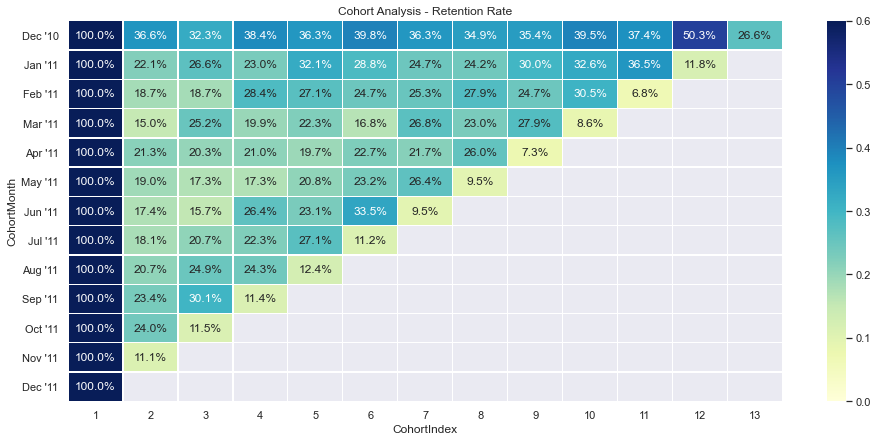

In [41]:
plt.figure(figsize = (16,7))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True,
            cmap = "YlGnBu",
            vmin = 0.0,
            vmax = 0.6,
            fmt = '.1%', 
            linewidth = 0.3,
            yticklabels=month_list
           )
plt.show()

###### About 50% of user from 2010/12 cohort return on 2011/11. Thus the final retention rate  is 50% approx (13/27)

#### Project Task: Week 2
###### Data Modeling: building a RFM (Recency Frequency Monetary) model.

In [42]:
#recency: How recently a customer has purchased
#frequency: how often they pruchase
#monetary: how much the customer spend

In [43]:
# creating a new column TotalPrice= quantity * UnitPrice
df_online_retail['TotalPrice'] = df_online_retail['Quantity']*df_online_retail['UnitPrice']

In [44]:
df_online_retail['MonetaryValue']= df_online_retail['TotalPrice']

In [45]:
df_online_retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalPrice,MonetaryValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1,22.00,22.00


In [46]:
# Now to calculate TotalPrice spend by each customer: (Monetary)
df_monetary = df_online_retail.groupby(['CustomerID']).agg({'MonetaryValue':sum}).reset_index()
df_monetary.head()

,CustomerID,MonetaryValue
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [47]:
# Now to calculate how frequently the cutomer made the purchase: (Frequency)
df_freq = df_online_retail.groupby(['CustomerID'])['CohortIndex'].nunique().reset_index()
#df_freq = df_online_retail.groupby(['CustomerID'])['CohortIndex'].count().reset_index()
# renaming the column name to Frequency 
df_freq.rename(columns={'CohortIndex':'Frequency'},inplace=True)
df_freq.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [48]:
# Now to Calculate Recency: How recent the customer purchased, can be calculated by getting the diff in first and last 
# transaction dates.
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date= max(df_online_retail['InvoiceDate'])

#difference between last date and transaction date
df_online_retail['Days_diff'] = max_date-df_online_retail['InvoiceDate']

#To get only Days in 'Days_diff'
df_online_retail['Days_diff'] = df_online_retail['Days_diff'].dt.days

In [49]:
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalPrice,MonetaryValue,Days_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1,15.30,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1,22.00,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,20.34,20.34,373


In [50]:
# recency per customer (last transaction date)
df_recency = df_online_retail.groupby('CustomerID')['Days_diff'].min().reset_index()
df_recency.head()

,CustomerID,Days_diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [51]:
# Now merge R, F and M dataframe to get RFM Dataframe

df_rf = pd.merge(df_recency,df_freq,on='CustomerID',how='inner')
df_rfm = pd.merge(df_rf,df_monetary,on='CustomerID',how='inner')

In [52]:
df_rfm.columns=['CustomerID','Recency','Frequency','MonetaryValue']

In [53]:
df_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,325,1,77183.60
1,12347,1,7,4310.00
2,12348,74,4,1797.24
3,12349,18,1,1757.55
4,12350,309,1,334.40


In [54]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4339 non-null   int64  
 1   Recency        4339 non-null   int64  
 2   Frequency      4339 non-null   int64  
 3   MonetaryValue  4339 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 169.5 KB


In [55]:
# Create labels and groups, then assign them to three percentile groups
#r_labels = range(4, 0, -1)
r_labels = [4,3,2,1]
r_groups = pd.qcut(df_rfm.Recency,q=4,labels=r_labels)


#f_labels = range(1, 5)
f_labels = [1,2,3,4]
f_groups = pd.qcut(df_rfm.Frequency.rank(method="first"),q=4,labels=f_labels) 
#f_groups = pd.qcut(df_rfm.Frequency,q=4,labels=f_labels) 

#m_labels = range(1, 5)
m_labels = [1,2,3,4]
m_groups = pd.qcut(df_rfm.MonetaryValue,q=4,labels=m_labels) 

 



In [56]:
# Create new columns in RFM dataframe with R,F,M columns
df_rfm['R'] = r_groups.values
df_rfm['F'] = f_groups.values
df_rfm['M'] = m_groups.values

In [57]:
df_rfm

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346,325,1,77183.60,1,1,4
1,12347,1,7,4310.00,4,4,4
2,12348,74,4,1797.24,2,3,4
3,12349,18,1,1757.55,3,1,4
4,12350,309,1,334.40,1,1,2
...,...,...,...,...,...,...,...
4334,18280,277,1,180.60,1,2,1
4335,18281,180,1,80.82,1,2,1
4336,18282,7,2,178.05,4,3,1
4337,18283,3,10,2045.53,4,4,4


In [58]:
# combining these 3 columns(R,F,M) to get the RFM segment and RFM score
df_rfm['RFM_Segment'] = df_rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']),axis=1)
df_rfm['RFM_Score'] = df_rfm[['R','F','M']].sum(axis=1)

In [59]:
df_rfm

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,12346,325,1,77183.60,1,1,4,114,6.0
1,12347,1,7,4310.00,4,4,4,444,12.0
2,12348,74,4,1797.24,2,3,4,234,9.0
3,12349,18,1,1757.55,3,1,4,314,8.0
4,12350,309,1,334.40,1,1,2,112,4.0
...,...,...,...,...,...,...,...,...,...
4334,18280,277,1,180.60,1,2,1,121,4.0
4335,18281,180,1,80.82,1,2,1,121,4.0
4336,18282,7,2,178.05,4,3,1,431,8.0
4337,18283,3,10,2045.53,4,4,4,444,12.0


In [60]:
#let's do segmentation
segment_dict = {    
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Potential Loyalists':'434', # High recency and monetary value, average frequency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'At Risk Customers':'244',   # Customer's shopping less often now who used to shop a lot
    'Can’t Lose Them':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}


In [61]:
# Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))


In [62]:
df_rfm['Segment'] = df_rfm['RFM_Segment'].map(lambda x: dict_segment.get(x))
#df_rfm["Segment"]=df_rfm["Recency"].astype(str)+ df_rfm["Frequency"].astype(str) + df_rfm["MonetaryValue"].astype(str)
#df_rfm["Segment"]=df_rfm["Segment"].replace(seg_map,regex=True)

In [63]:
# Fill other scores with 'Others'
df_rfm.Segment.fillna('Others', inplace=True)

In [64]:
df_rfm

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment
0,12346,325,1,77183.60,1,1,4,114,6.0,Others
1,12347,1,7,4310.00,4,4,4,444,12.0,Best Customers
2,12348,74,4,1797.24,2,3,4,234,9.0,Others
3,12349,18,1,1757.55,3,1,4,314,8.0,Others
4,12350,309,1,334.40,1,1,2,112,4.0,Others
...,...,...,...,...,...,...,...,...,...,...
4334,18280,277,1,180.60,1,2,1,121,4.0,Others
4335,18281,180,1,80.82,1,2,1,121,4.0,Others
4336,18282,7,2,178.05,4,3,1,431,8.0,Others
4337,18283,3,10,2045.53,4,4,4,444,12.0,Best Customers


In [65]:
RFM_Segment_Counts = df_rfm[df_rfm.Segment!='None'].groupby('Segment')['CustomerID'].count().reset_index(name='counts')

In [66]:
RFM_Segment_Counts

,Segment,counts
0,At Risk Customers,88
1,Best Customers,469
2,Big Spenders,69
3,Can’t Lose Them,11
4,Lost Cheap Customers,129
5,Loyal Customers,207
6,Others,3191
7,Potential Loyalists,70
8,Recent Customers,105


### Project Task: Week 3

#### Data Modeling :

In [67]:
# Using Dataset: df_rfm

In [68]:
# import required libraries for clustering
from scipy.stats import norm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

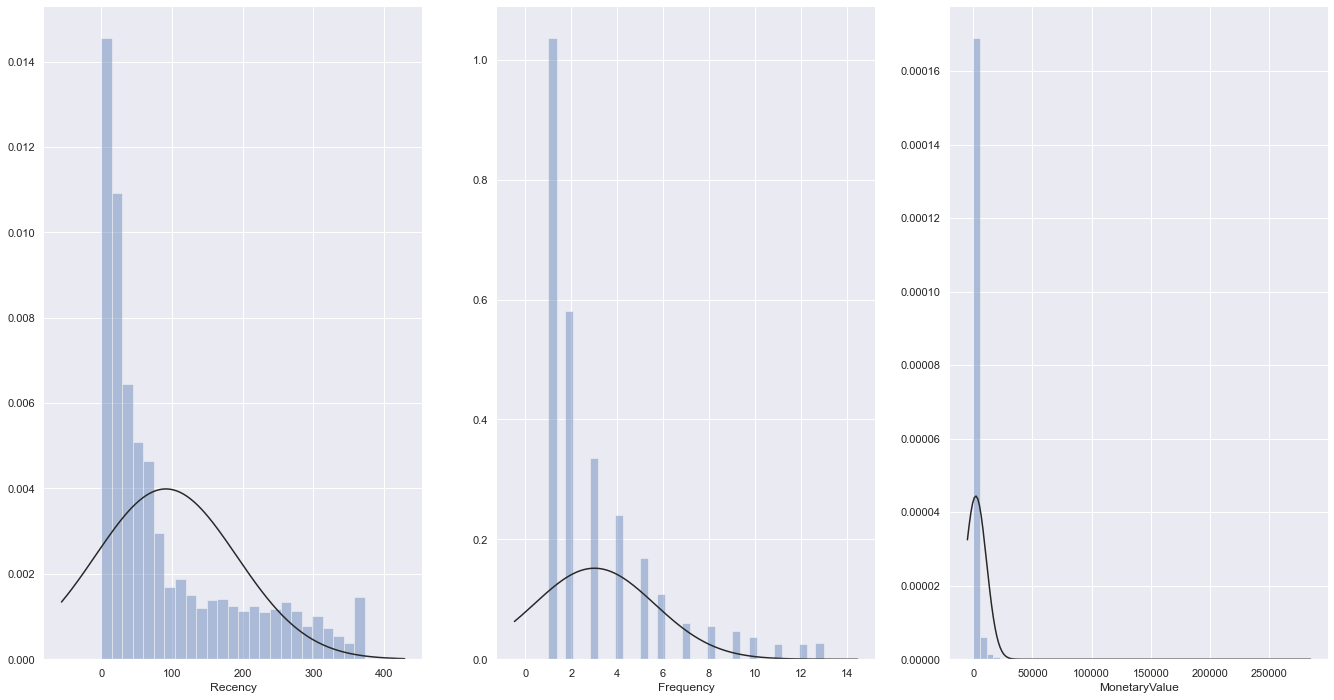

In [69]:
f,ax = plt.subplots(1,3, figsize=(23,12))
sns.despine(left=True)
x = pd.Series(df_rfm['Recency'], name="Recency")
sns.distplot(x,fit=norm, kde=False,ax=ax[0])
y = pd.Series(df_rfm['Frequency'], name="Frequency")
sns.distplot(y,fit=norm, kde=False,ax=ax[1])
z = pd.Series(df_rfm['MonetaryValue'], name="MonetaryValue")
sns.distplot(z,fit=norm, kde=False,ax=ax[2])
plt.show()

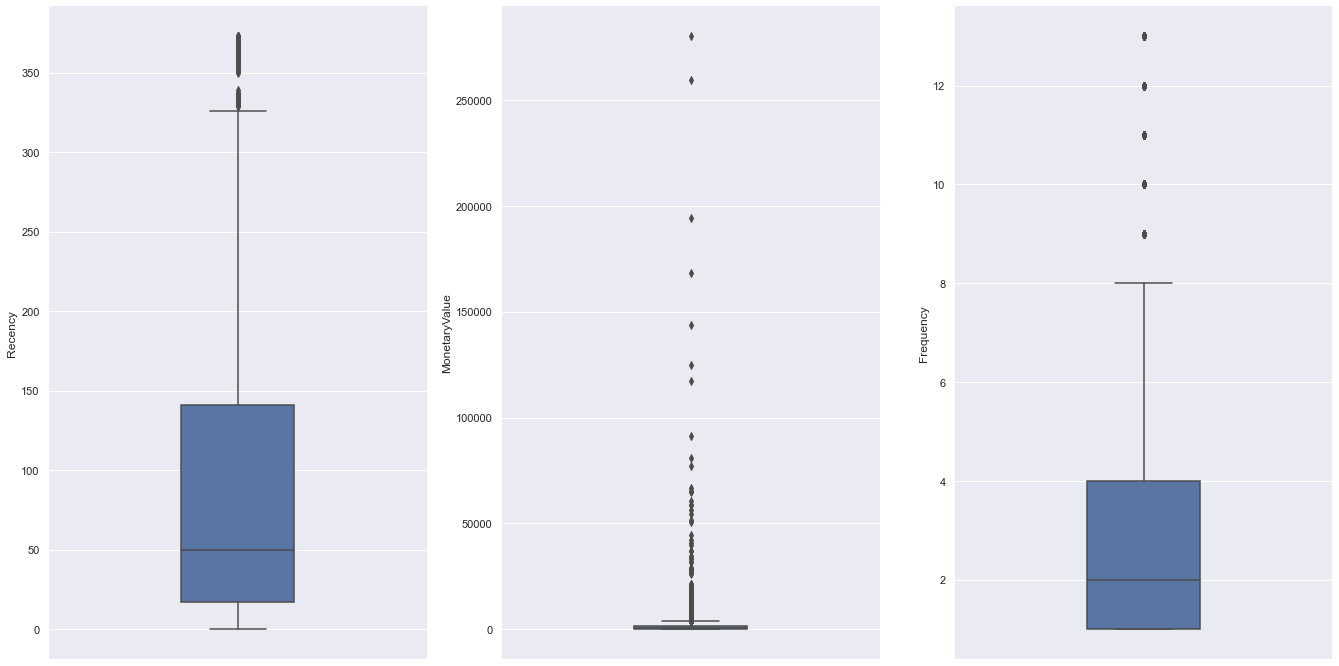

In [70]:
# From the third plot(Monetary Value), extreme skewness can be seen. Need to be treated. Lets plot Boxplot for each
# set up the axes of subplot:
f,ax = plt.subplots(1,3, figsize=(23,12))
sns.despine(left=True)
cols=['Recency','MonetaryValue','Frequency']
sns.boxplot(cols[0],data=df_rfm,orient='v',ax=ax[0],width=0.3)
sns.boxplot(cols[1],data=df_rfm,orient='v',ax=ax[1],width=0.3)
sns.boxplot(cols[2],data=df_rfm,orient='v',ax=ax[2],width=0.3)
plt.show()

#### From both the above plot representation it can be seen that the Monetary_value is having extreme skewness. Need to be treated.

In [71]:
# Treating Outliers for MonetaryValue:
Q1 = df_rfm.MonetaryValue.quantile(0.05)
Q3 = df_rfm.MonetaryValue.quantile(0.95)

IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.MonetaryValue>=Q1 - 1.5*IQR)&(df_rfm.MonetaryValue<=Q3 + 1.5*IQR)]

In [72]:
# Treating Outliers for Frequency:
Q1 = df_rfm.Frequency.quantile(0.05)
Q3 = df_rfm.Frequency.quantile(0.95)

IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.Frequency>=Q1 - 1.5*IQR)&(df_rfm.Frequency<=Q3 + 1.5*IQR)]

In [73]:
# Treating Outliers for Recency:
Q1 = df_rfm.Recency.quantile(0.05)
Q3 = df_rfm.Recency.quantile(0.95)

IQR = Q3 - Q1
df_rfm = df_rfm[(df_rfm.Recency>=Q1 - 1.5*IQR)&(df_rfm.Recency<=Q3 + 1.5*IQR)]

##### Rescaling the Attributes using standardization

In [74]:
rfm_df = df_rfm[['Recency','Frequency','MonetaryValue']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4276, 3)

In [75]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Recency','Frequency','MonetaryValue']
rfm_df_scaled.head()

,Recency,Frequency,MonetaryValue
0,-0.914622,1.669261,1.616030
1,-0.185589,0.447739,0.249982
2,-0.744847,-0.773783,0.228405
3,2.161298,-0.773783,-0.545282
4,-0.575072,0.447739,0.635318


#### Building the Model

In [76]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [77]:
kmeans.labels_

array([3, 3, 0, ..., 0, 3, 0])

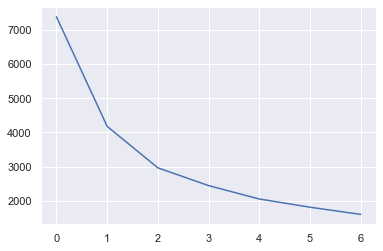

In [78]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [79]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.49620602939920383
For n_clusters=3, the silhouette score is 0.49481465502147925
For n_clusters=4, the silhouette score is 0.4700925610565307
For n_clusters=5, the silhouette score is 0.43788562803014736
For n_clusters=6, the silhouette score is 0.41097677909987673
For n_clusters=7, the silhouette score is 0.4117819161420224
For n_clusters=8, the silhouette score is 0.4005710011527325


In [80]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [81]:
 kmeans.labels_

array([1, 0, 0, ..., 0, 1, 0])

In [82]:
# assign the label
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment,Cluster_Id
1,12347,1,7,4310.00,4,4,4,444,12.0,Best Customers,1
2,12348,74,4,1797.24,2,3,4,234,9.0,Others,0
3,12349,18,1,1757.55,3,1,4,314,8.0,Others,0
4,12350,309,1,334.40,1,1,2,112,4.0,Others,2
5,12352,35,4,2506.04,3,3,4,334,10.0,Big Spenders,0


##### The optimum number of clusters to be formed = 3. 

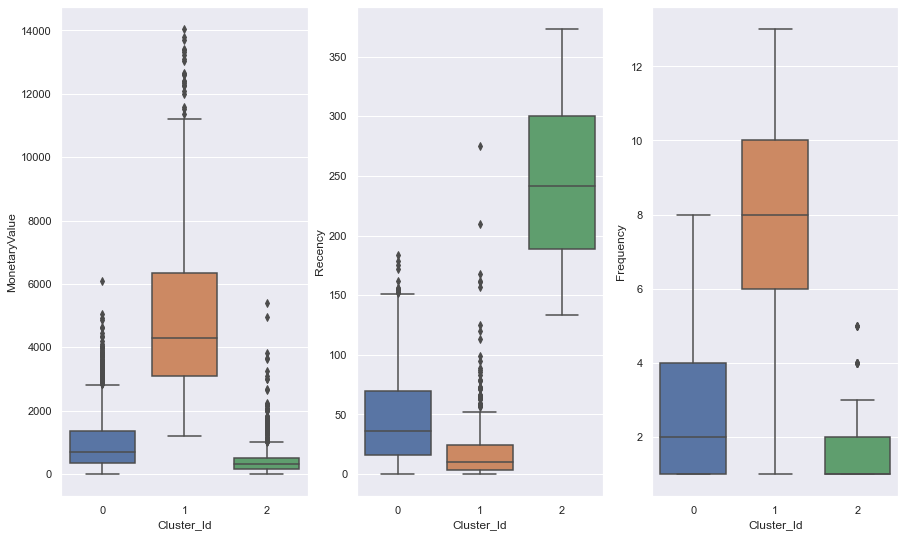

In [83]:
f,ax = plt.subplots(1,3,figsize=(15,9))
sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=df_rfm,ax=ax[0])
sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm,ax=ax[1])
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm,ax=ax[2])
plt.show()

## Inference:
###### 1. CustomerIDs with clusterID as 1 are the customers with high amount of transactions as compared to other customers.
###### 2. But, customers with clusterID 1 are not recent buyers and hence can't lose the customers with clusterID 1. Some Value added services should be given to them in business point of view. 
###### 3. Customers with clusterID 0 are recent buyers but there transaction amount is lesser than other two clusterIDs and hence not much attention is required on them.